# SuperStore Analysis

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df =  pd.read_csv("SampleSuperstore.csv")

In [35]:
df.head(5)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [36]:
df.shape

(9994, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [38]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: >

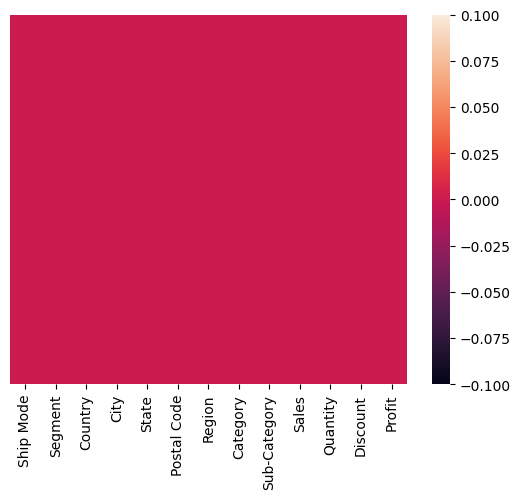

In [39]:
sns.heatmap(df.isnull(),yticklabels=False)

In [40]:
#checking for negative values in profit column
negative_profit = df[df["Profit"] < 0]

if negative_profit.empty:
    print("No negative values found in the Profit column.")
else:
    print("Negative values found in the Profit column:")
    print(negative_profit["Profit"])

Negative values found in the Profit column:
3       -383.0310
14      -123.8580
15        -3.8160
23        -1.0196
27     -1665.0522
          ...    
9920     -35.8176
9921      -4.5936
9931     -40.1960
9937      -1.7772
9962     -67.6704
Name: Profit, Length: 1871, dtype: float64


In [41]:
df["Profit"] = df["Profit"].abs()

In [42]:
#checking for negative values in profit column
negative_profit = df[df["Profit"] < 0]

if negative_profit.empty:
    print("No negative values found in the Profit column.")
else:
    print("Negative values found in the Profit column:")
    print(negative_profit["Profit"])

No negative values found in the Profit column.


In [43]:
#checking for negative values in Sales column
negative_profit = df[df["Sales"] < 0]

if negative_profit.empty:
    print("No negative values found in the Sales column.")
else:
    print("Negative values found in the Sales column:")
    print(negative_profit["Sales"])

No negative values found in the Sales column.


In [44]:
# Checking for zero values in the Profit column
zero_profit = df[df["Profit"] == 0]

# Count the number of rows with zero profit
zero_profit_count = zero_profit.shape[0]

if zero_profit_count == 0:
    print("No zero values found in the Profit column.")
else:
    print(f"{zero_profit_count} rows contain zero values in the Profit column.")
    print(zero_profit[["Profit"]])


65 rows contain zero values in the Profit column.
      Profit
234      0.0
551      0.0
563      0.0
569      0.0
819      0.0
...      ...
9412     0.0
9641     0.0
9886     0.0
9898     0.0
9977     0.0

[65 rows x 1 columns]


In [45]:
# Filter out rows with zero profit
df = df[df["Profit"] != 0]

# Verify that rows with zero profit have been removed
zero_profit_removed = df[df["Profit"] == 0]

if zero_profit_removed.empty:
    print("All rows with zero profit have been successfully removed.")
else:
    print("There are still rows with zero profit remaining.")


All rows with zero profit have been successfully removed.


In [46]:
# Checking for zero values in the Profit column
zero_Sales = df[df["Sales"] == 0]

# Count the number of rows with zero profit
zero_Sales_count = zero_Sales.shape[0]

if zero_Sales_count == 0:
    print("No zero values found in the sales column.")
else:
    print(f"{zero_profit_count} rows contain zero values in the Sales column.")
    print(zero_profit[["Sales"]])


No zero values found in the sales column.


In [47]:
df.shape

(9929, 13)

In [48]:
df[["Profit", "Sales"]].describe()


,Profit,Sales
count,9929.000000,9929.000000
mean,60.294047,228.574279
std,228.971678,623.626176
min,0.062800,0.444000
25%,5.443200,17.150000
50%,14.212000,53.720000
75%,43.598100,207.480000
max,8399.976000,22638.480000


### Sales and Profit Analysis:

### What is the total sales and profit across different regions?

In [49]:
 df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)

,Sales,Profit
Region,,
East,670079.9380,190703.9950
West,716671.9225,153860.3707
Central,497105.5758,152336.1325
South,385656.5770,101759.0949


C:\Users\User\AppData\Local\Temp\ipykernel_6780\2923088703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Region", data=region_sales_profit, ax=axes[0], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_6780\2923088703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Region", data=region_sales_profit, ax=axes[1], palette="viridis")


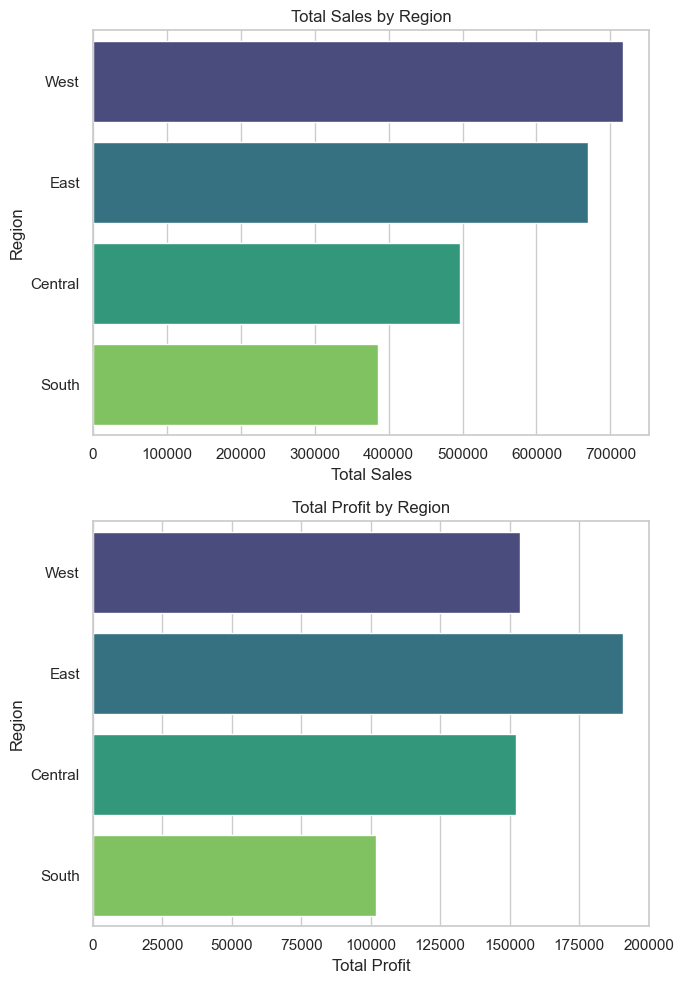

In [50]:
# Group by region and calculate total sales and profit
region_sales_profit = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()

# Sort by sales for better visualization
region_sales_profit = region_sales_profit.sort_values(by="Sales", ascending=False)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 10))

# Plot total sales by region
sns.barplot(x="Sales", y="Region", data=region_sales_profit, ax=axes[0], palette="viridis")
axes[0].set_title("Total Sales by Region")
axes[0].set_xlabel("Total Sales")
axes[0].set_ylabel("Region")

# Plot total profit by region
sns.barplot(x="Profit", y="Region", data=region_sales_profit, ax=axes[1], palette="viridis")
axes[1].set_title("Total Profit by Region")
axes[1].set_xlabel("Total Profit")
axes[1].set_ylabel("Region")

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

We can see that The east region have highest profit and west have highest total sales

In [51]:
g = df.groupby("Country")["Profit"].sum().sort_values(ascending=False)

# Print the total profit for each country
print("Total profit by country:")
print(g)

Total profit by country:
Country
United States    598659.5931
Name: Profit, dtype: float64


In [52]:
 df["Country"].unique()

array(['United States'], dtype=object)

### Which categories and sub-categories contribute the most to sales and profit?

In [53]:
# Group by category and sum the sales
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

# Sort the result by sales in ascending order
category_sales_sorted = category_sales.sort_values(by="Sales", ascending=True)

# Display the sorted result
print(category_sales_sorted)


          Category        Sales
1  Office Supplies  710597.4240
0        Furniture  723002.5483
2       Technology  835914.0410


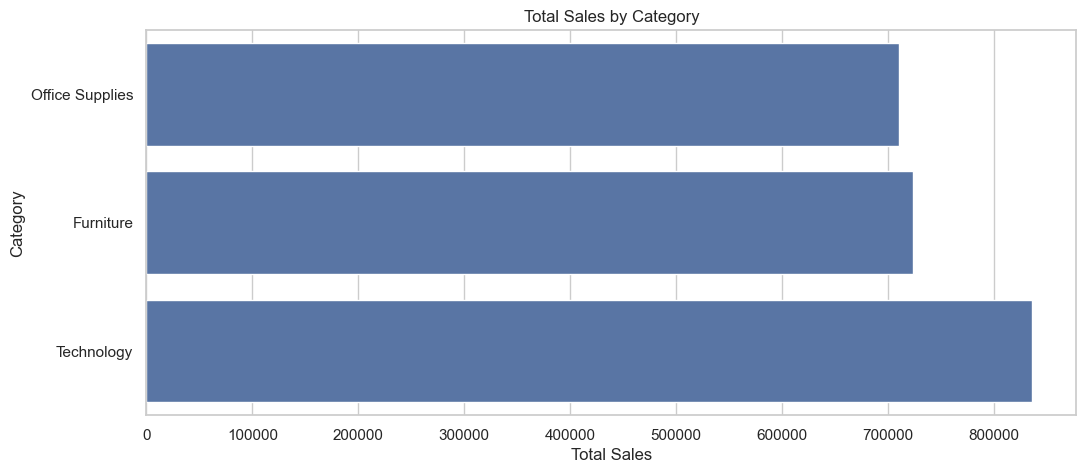

In [54]:
# Set the style of seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.barplot(x="Sales", y="Category", data=category_sales_sorted)
plt.title("Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

Technology is the category which contribute to highest to sales

In [55]:
# Group by category and sum the sales
l = df.groupby("Category")["Profit"].sum().reset_index()

# Sort the result by sales in ascending order
category_Profit_sorted = l.sort_values(by="Profit", ascending=True)

# Display the sorted result
print(category_Profit_sorted)


          Category       Profit
0        Furniture  140323.4908
2       Technology  222614.7845
1  Office Supplies  235721.3178


Text(0.5, 1.0, 'Total Profit by Category')

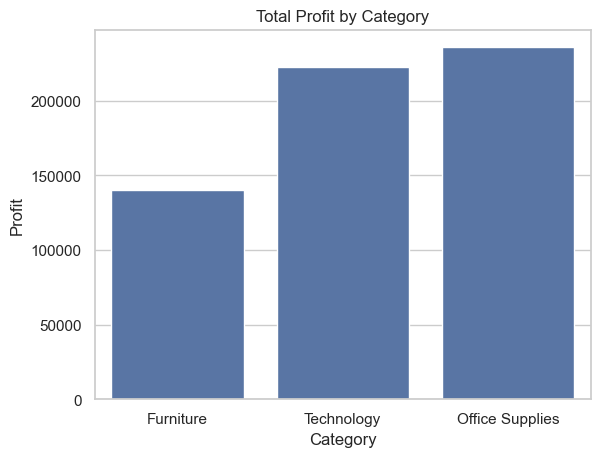

In [56]:
sns.barplot(x="Category" , y="Profit" , data = category_Profit_sorted)
plt.title("Total Profit by Category")

Office Supplies category have contributes highest in profit

In [57]:
df.groupby(["Category","Sub-Category"])["Profit"].sum().reset_index()

,Category,Sub-Category,Profit
0,Furniture,Bookcases,20831.8560
1,Furniture,Chairs,46351.8489
2,Furniture,Furnishings,26040.9704
3,Furniture,Tables,47098.8155
4,Office Supplies,Appliances,35397.2878
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,107242.7561
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,1015.9086
9,Office Supplies,Labels,5546.2540


Text(0.5, 1.0, 'Category and Sub - Category in terms of Profit')

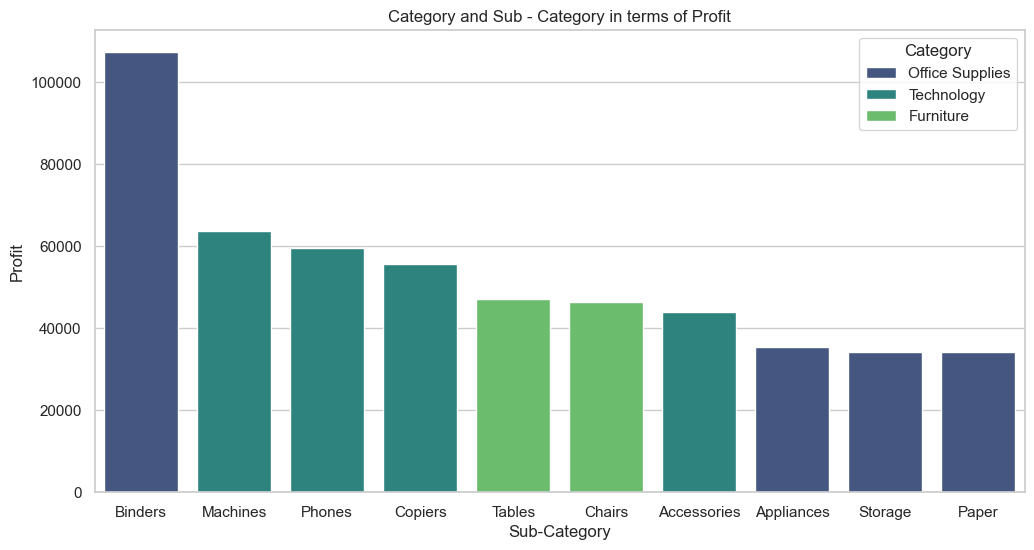

In [58]:
g = df.groupby(["Category","Sub-Category"])["Profit"].sum().reset_index().sort_values(by = "Profit",ascending = False)[:10]
plt.figure(figsize=(12, 6)) 
sns.barplot(x="Sub-Category" , y = "Profit" , hue="Category" , data = g , palette="viridis")
plt.title("Category and Sub - Category in terms of Profit")

The Binders sub- category of Office Supply Category  contribute highest in total profit



Text(0.5, 1.0, 'Category and Sub - Category in terms of Sales')

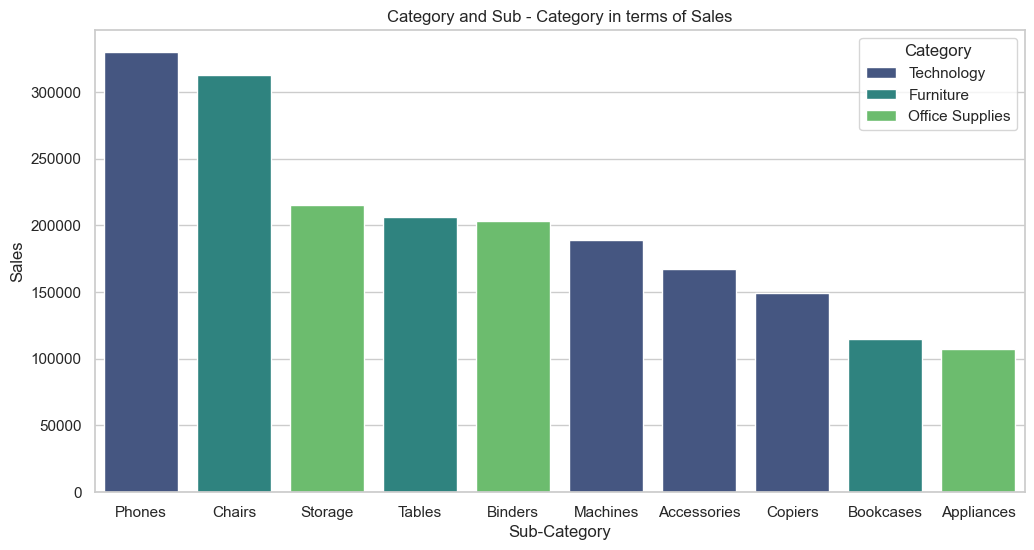

In [59]:
f = df.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index().sort_values(by = "Sales",ascending = False)[:10]
plt.figure(figsize=(12, 6)) 
sns.barplot(x="Sub-Category" , y = "Sales" , hue="Category" , data = f , palette="viridis")
plt.title("Category and Sub - Category in terms of Sales")

Phone of Category Technology have highest Sales then comes chair 

### How does the discount affect the profit?

In [60]:
summary_statistic = df[["Discount","Profit"]].describe()
print(summary_statistic)

          Discount       Profit
count  9929.000000  9929.000000
mean      0.156389    60.294047
std       0.206873   228.971678
min       0.000000     0.062800
25%       0.000000     5.443200
50%       0.200000    14.212000
75%       0.200000    43.598100
max       0.800000  8399.976000


In [61]:
# find the correlations 
correlation = df["Discount"].corr(df["Profit"])
print(f"Correlation between Discount and Profit: {correlation}")

Correlation between Discount and Profit: 0.033004991645963835


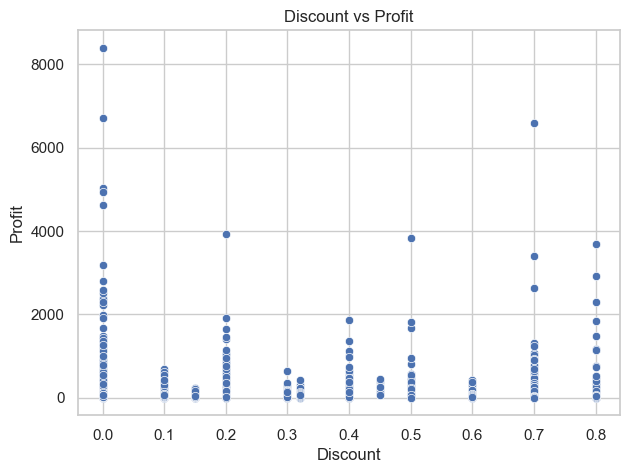

In [62]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

The correlation between Discount and Profit is 0.033, indicating a very weak positive relationship. This suggests that discounts have a negligible impact on profit.

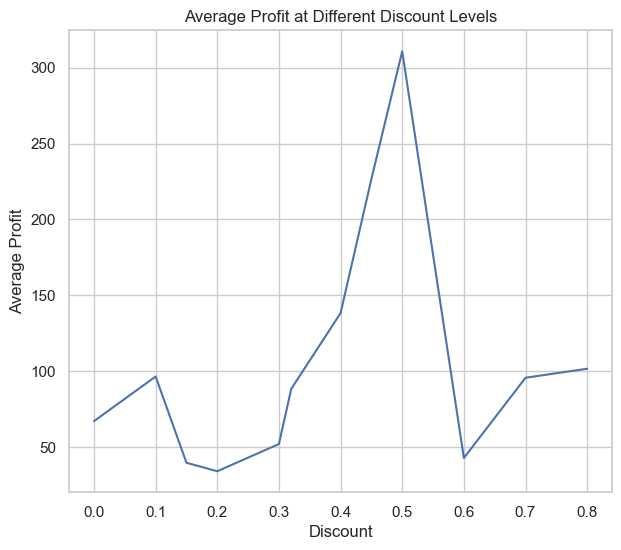

In [63]:
# Group by discount levels and calculate average profit
discount_profit_trend = df.groupby('Discount')['Profit'].mean().reset_index()

# Line plot to visualize the trend
plt.figure(figsize=(7, 6))
sns.lineplot(x='Discount', y='Profit', data=discount_profit_trend)
plt.title('Average Profit at Different Discount Levels')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()


This graph shows that the impact of discount on avergae profit as the greater discunt fro 0.6 is having negative impact on profit

##  Segment and Region Analysis:

### How do sales and profit vary across different customer segments (Consumer, Corporate, Home Office)?

In [64]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

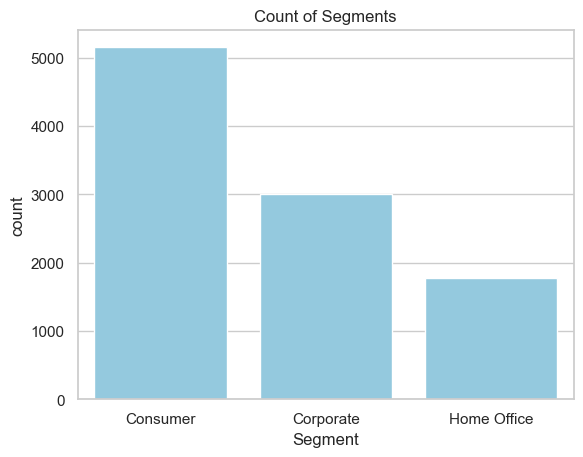

In [65]:
sns.countplot(x="Segment", data=df, color='skyblue')

# Add title
plt.title("Count of Segments")

# Show the plot
plt.show()


The consumer have highest popluarity

In [66]:
df.groupby("Segment")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Sales", ascending=True)


,Segment,Profit,Sales
2,Home Office,113095.4123,4.261072e+05
1,Corporate,181553.5492,7.004246e+05
0,Consumer,304010.6316,1.142982e+06


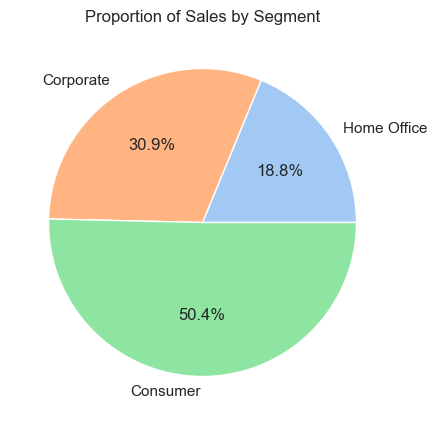

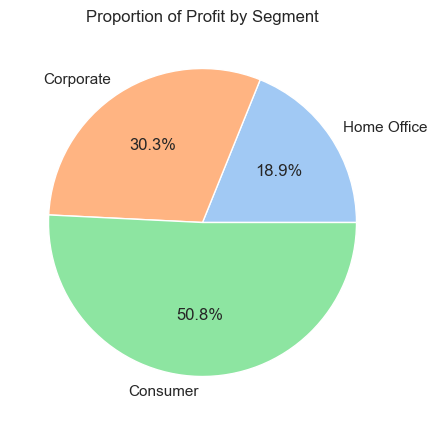

In [67]:
segemnt_cal =df.groupby("Segment")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Sales", ascending=True)
# Create a pie chart for sales
plt.figure(figsize=(7,5))
plt.pie(segemnt_cal['Sales'], labels=segemnt_cal['Segment'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Proportion of Sales by Segment')
plt.show()
# Create a pie chart for profit
plt.figure(figsize=(7,5))
plt.pie(segemnt_cal['Profit'], labels=segemnt_cal['Segment'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Proportion of Profit by Segment')
plt.show()


The Segment consumer have highest profit and sales as compare to others

### What are the sales and profit figures for each region?

In [68]:
df.groupby("Region")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Profit", ascending=True)


,Region,Sales,Profit
2,South,385656.5770,101759.0949
0,Central,497105.5758,152336.1325
3,West,716671.9225,153860.3707
1,East,670079.9380,190703.9950


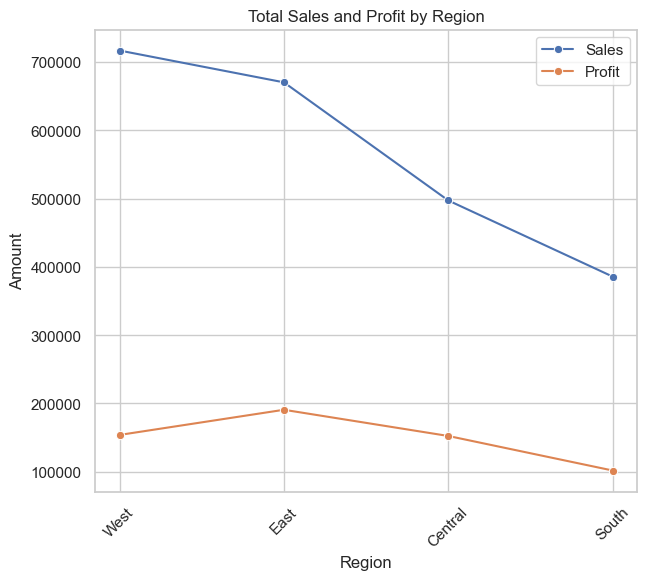

In [69]:
plt.figure(figsize=(7,6))
sns.lineplot(data=region_sales_profit, x="Region", y="Sales", marker='o', label="Sales")
sns.lineplot(data=region_sales_profit, x="Region", y="Profit", marker='o', label="Profit")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.title("Total Sales and Profit by Region")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In this graph we can see that East region have highest profit as compare to others and west region have highest sales as compared to others

### Which regions are the most profitable?

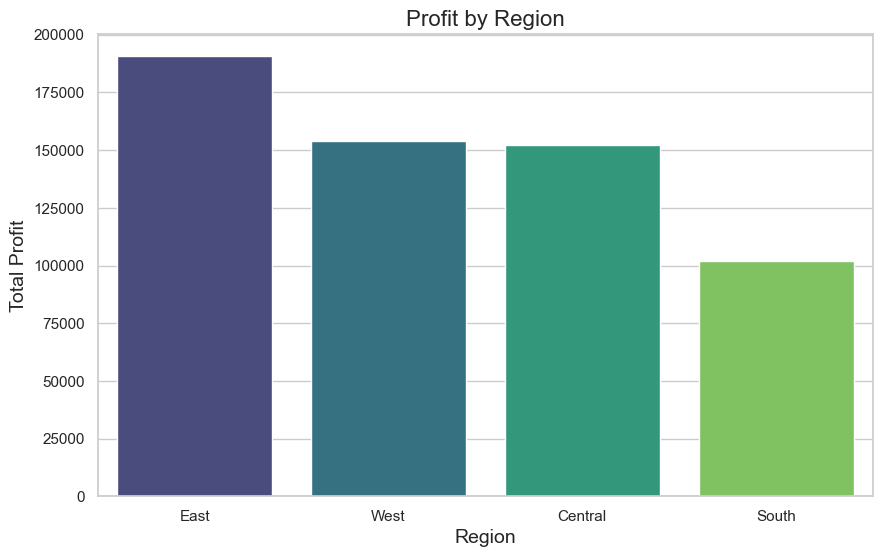

In [70]:
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region, hue='Region', palette='viridis', legend=False)
plt.title("Profit by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Profit", fontsize=14)
plt.show()

As you can see the region having high profit is East then West

## Ship Mode Analysis:

### How does the ship mode impact sales and profit?

In [71]:
df.groupby("Ship Mode")[["Profit","Sales"]].sum().reset_index().sort_values(by="Profit",ascending = True)

,Ship Mode,Profit,Sales
1,Same Day,33687.9697,1.282992e+05
0,First Class,94290.3817,3.456983e+05
2,Second Class,105895.3812,4.559901e+05
3,Standard Class,364785.8605,1.339526e+06


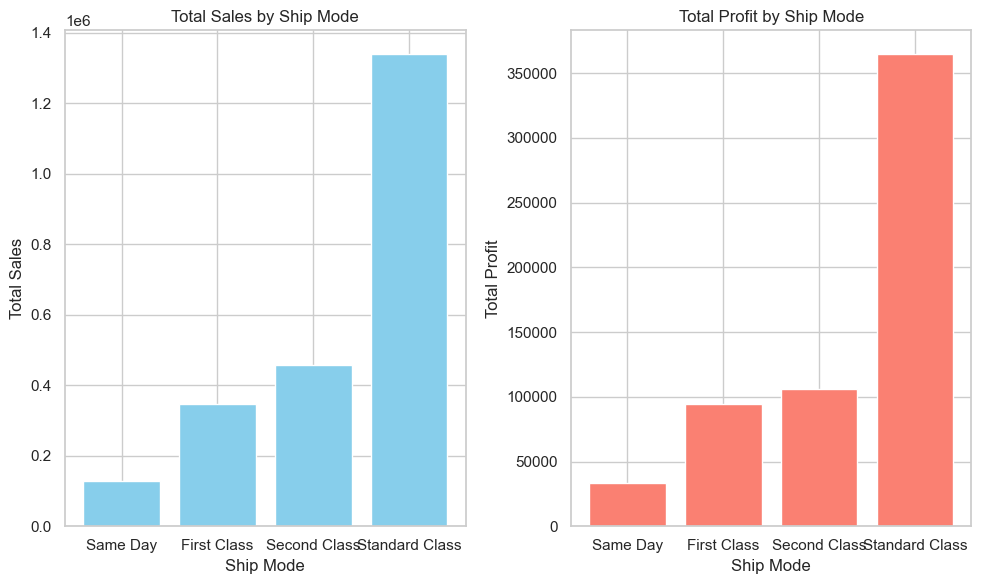

In [72]:
# Grouping the data by ship mode and calculating total profit and sales
ship_mode_data = df.groupby("Ship Mode")[["Profit", "Sales"]].sum().reset_index()
ship_mode_data = ship_mode_data.sort_values(by="Profit", ascending=True)
plt.figure(figsize=(10, 6))
# Bar plot for sales
plt.subplot(1, 2, 1)
plt.bar(ship_mode_data["Ship Mode"], ship_mode_data["Sales"], color='skyblue')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
plt.bar(ship_mode_data["Ship Mode"], ship_mode_data["Profit"], color='salmon')
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()


We can see that standard class have highest sales and profit then reset of shipping mode

### What is the most commonly used ship mode?

<Axes: xlabel='Ship Mode', ylabel='count'>

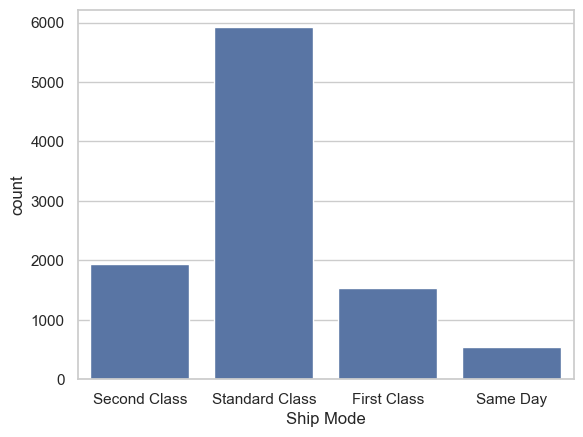

In [73]:
sns.countplot(x="Ship Mode",data= df)


In this graph we can see the highest popluarty of shipping mode in whicj=h we can see that standard class have hihest popularty

## Geographical Analysis:

### Which states and cities generate the most sales and profit?

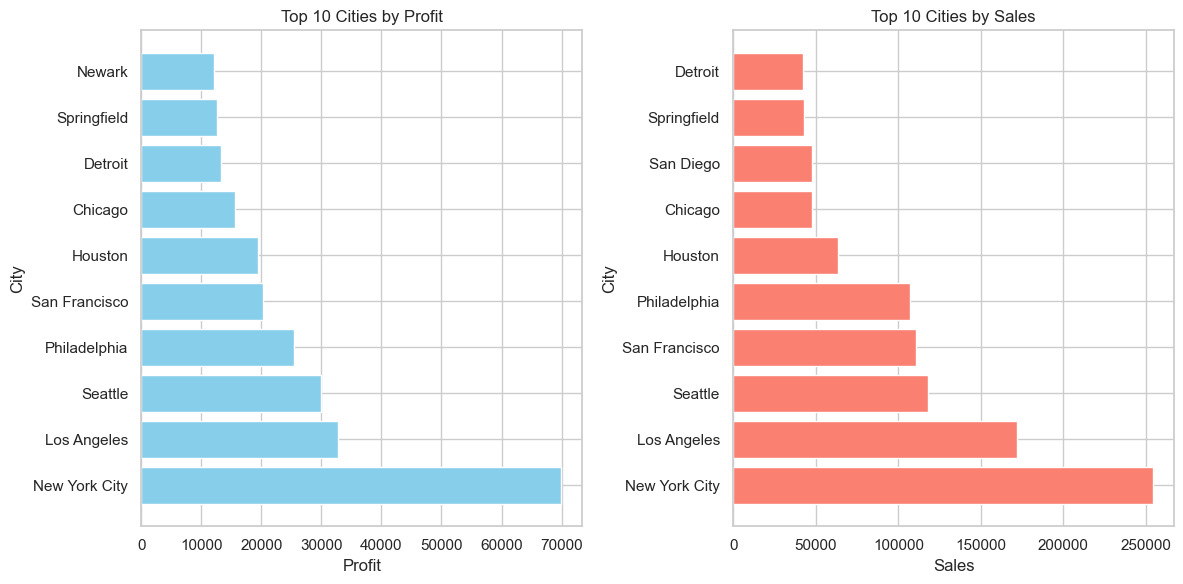

In [85]:

# You can read your data into a DataFrame using pd.read_csv('your_data.csv')

# Grouping data by city and calculating total sales and profit
city_sales_profit = df.groupby('City')[['Sales', 'Profit']].sum()

# Sorting cities by profit and sales
city_profit_sorted = city_sales_profit.sort_values(by='Profit', ascending=False)
city_sales_sorted = city_sales_profit.sort_values(by='Sales', ascending=False)

# Get the top 10 cities by profit and sales
top_cities_profit = city_profit_sorted.head(10)
top_cities_sales = city_sales_sorted.head(10)

# Plotting the top cities by profit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_cities_profit.index, top_cities_profit["Profit"], color='skyblue')
plt.title('Top 10 Cities by Profit')
plt.xlabel('Profit')
plt.ylabel('City')

# Plotting the top cities by sales
plt.subplot(1, 2, 2)
plt.barh(top_cities_sales.index, top_cities_sales["Sales"], color='salmon')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')

plt.tight_layout()
plt.show()


the graph shows top 10 states but New York city City have highest profit the grah shows top 10 profit but New York city CITY have highest sales

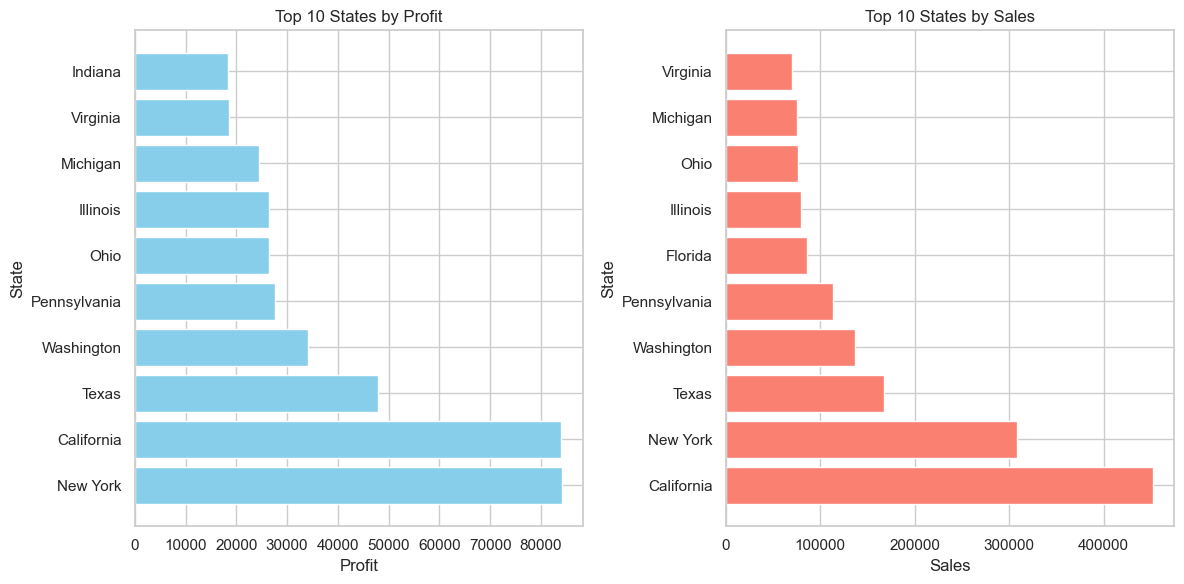

In [75]:

top_states_profit = df.groupby("State")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Profit", ascending=False).head(10)
top_states_sales = df.groupby("State")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_states_profit["State"], top_states_profit["Profit"], color='skyblue')
plt.title('Top 10 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.subplot(1, 2, 2)
plt.barh(top_states_sales["State"], top_states_sales["Sales"], color='salmon')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')

plt.tight_layout()
plt.show()


the graph shows top 10 states but New York state have highest profit
the grah shows top 10 profit but Califorina state have highest sales

### Are there any regions with consistently high or low performance?

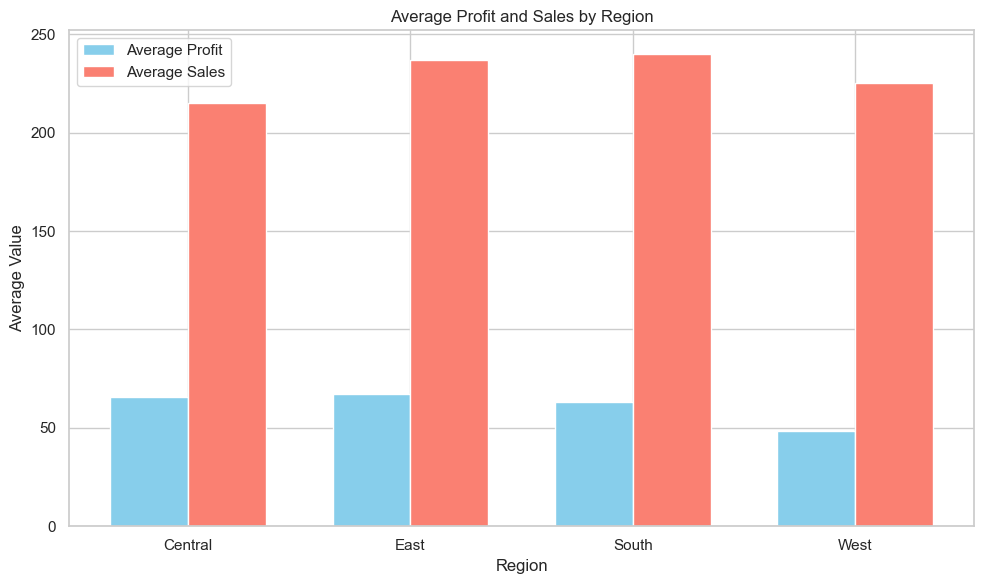

In [87]:

# Grouping data by region and calculating average sales and profit
region_performance = df.groupby('Region')[['Sales', 'Profit']].mean().reset_index()

# Get the data
regions = region_performance["Region"]
average_profit = region_performance["Profit"]
average_sales = region_performance["Sales"]

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = np.arange(len(regions))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, average_profit, bar_width, label='Average Profit', color='skyblue')
plt.bar(index + bar_width, average_sales, bar_width, label='Average Sales', color='salmon')

# Add labels, title, and legend
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.title('Average Profit and Sales by Region')
plt.xticks(index + bar_width / 2, regions)
plt.legend()

plt.tight_layout()
plt.show()


In this graph we can see that south have high performance as the average sales and profit are high 

In [91]:
region_total_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()

# Grouping data by region and counting the number of entries
region_counts = df.groupby('Region').size()

# Calculating the average sales and profit
region_avg_sales_profit = region_total_sales_profit.copy()
region_avg_sales_profit['Average Sales'] = region_total_sales_profit['Sales'] / region_counts
region_avg_sales_profit['Average Profit'] = region_total_sales_profit['Profit'] / region_counts

# Sorting by average profit in descending order
region_avg_sales_profit = region_avg_sales_profit.sort_values(by='Average Profit', ascending=False)

print("Average Sales and Profit by Region (Descending Order):")
print(region_avg_sales_profit)


Average Sales and Profit by Region (Descending Order):
               Sales       Profit  Average Sales  Average Profit
Region                                                          
East     670079.9380  190703.9950     236.861060       67.410391
Central  497105.5758  152336.1325     215.011062       65.889331
South    385656.5770  101759.0949     239.985424       63.322399
West     716671.9225  153860.3707     225.297681       48.368554


## Product Category Analysis:

### Which product categories and sub-categories are the best and worst performers in terms of sales and profit?

In [79]:
o=df.groupby("Category")["Profit"].mean()
j=df.groupby("Category")["Sales"].mean()
print(o)
print(j)

Category
Furniture           67.204737
Office Supplies     39.306540
Technology         120.723853
Name: Profit, dtype: float64
Category
Furniture          346.265588
Office Supplies    118.492150
Technology         453.315640
Name: Sales, dtype: float64


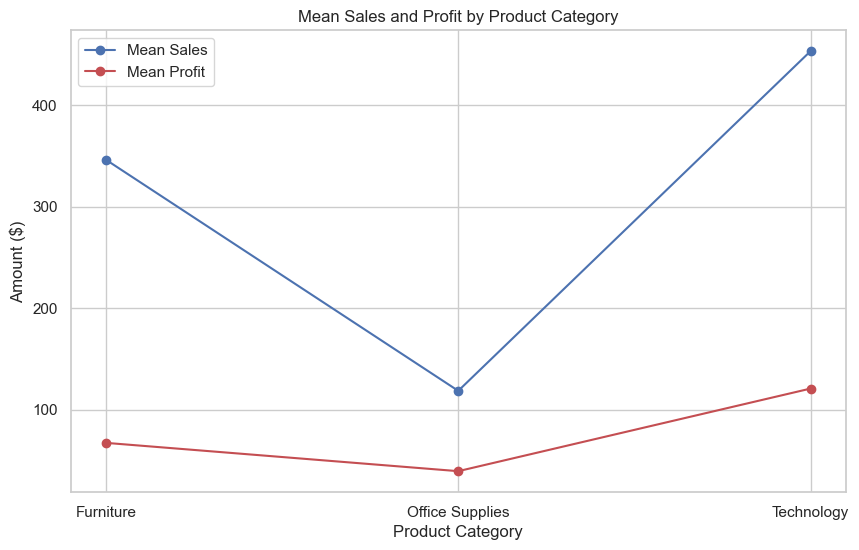

In [80]:
categories = ['Furniture', 'Office Supplies', 'Technology']
mean_sales = j.values
mean_profit = o.values

# Plot
plt.figure(figsize=(10, 6))

# Plot mean sales
plt.plot(categories, mean_sales, marker='o', linestyle='-', color='b', label='Mean Sales')

# Plot mean profit
plt.plot(categories, mean_profit, marker='o', linestyle='-', color='r', label='Mean Profit')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Amount ($)')
plt.title('Mean Sales and Profit by Product Category')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


From the graph, it's evident that the Technology category emerges as the best performer, boasting the highest mean sales and profit. Office Supplies, on the other hand, appear as the worst performer with notably lower mean sales and profit compared to Furniture and Technology categories. Furniture falls in between, exhibiting moderate mean sales and profit. 







In [81]:
o = df.groupby("Sub-Category")["Profit"].mean().sort_values(ascending=True)
j = df.groupby("Sub-Category")["Sales"].mean().sort_values(ascending=True)
print("Mean Profit by Sub-Category:")
print(o)
print("\nMean Sales by Sub-Category:")
print(j)


Mean Profit by Sub-Category:
Sub-Category
Fasteners        4.792022
Art              8.200737
Labels          15.236962
Paper           24.856620
Supplies        25.484970
Envelopes       27.418019
Furnishings     27.469378
Storage         41.522426
Accessories     56.586420
Phones          67.166829
Binders         70.415467
Appliances      75.959845
Chairs          77.641288
Bookcases       92.176354
Tables         148.576705
Machines       553.235594
Copiers        817.909190
Name: Profit, dtype: float64

Mean Sales by Sub-Category:
Sub-Category
Fasteners        14.103160
Art              34.068834
Labels           34.303055
Paper            57.284092
Envelopes        64.867724
Furnishings      94.664966
Binders         133.560560
Accessories     216.221765
Appliances      230.755710
Supplies        245.650200
Storage         262.078358
Phones          371.805788
Bookcases       506.370285
Chairs          524.051251
Tables          649.722016
Machines       1645.553313
Copiers      

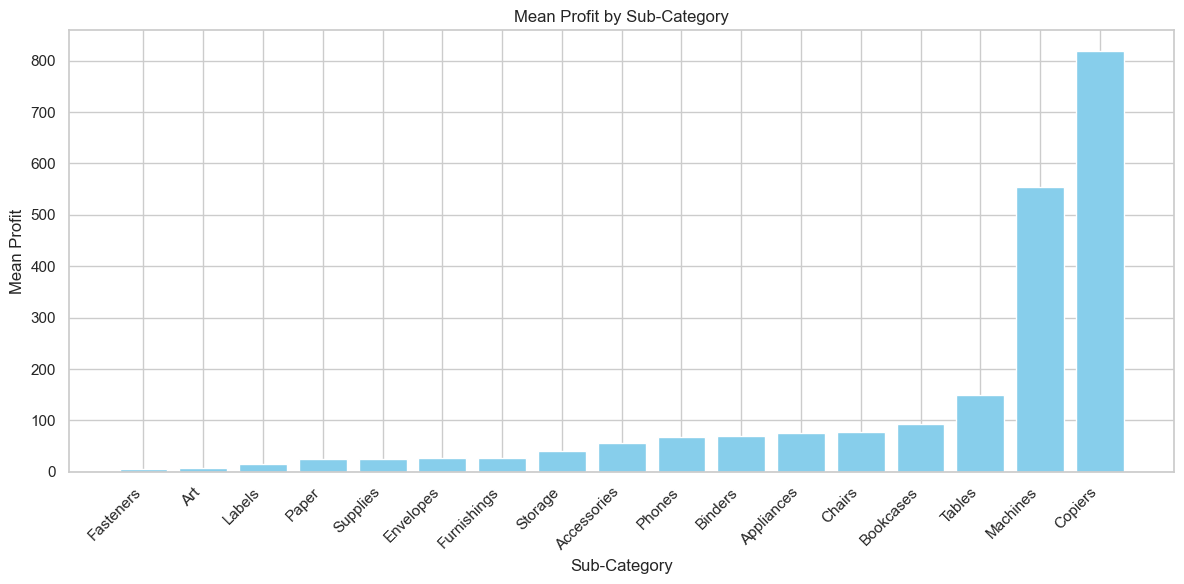

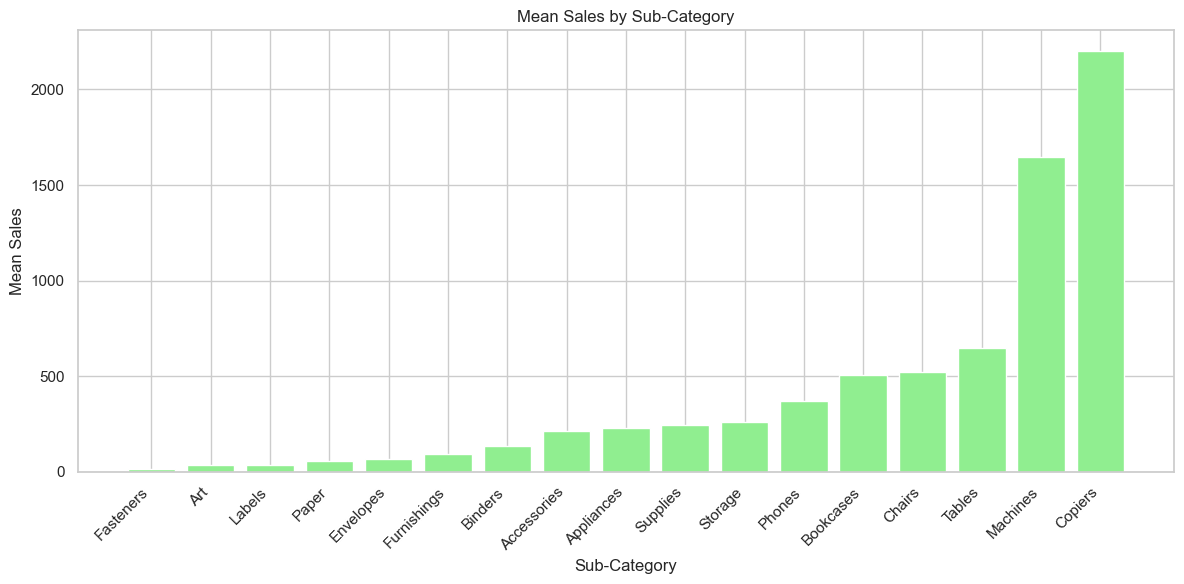

In [82]:
import matplotlib.pyplot as plt

# Plotting mean profit by sub-category
plt.figure(figsize=(12, 6))
plt.bar(o.index, o.values, color='skyblue')
plt.xlabel('Sub-Category')
plt.ylabel('Mean Profit')
plt.title('Mean Profit by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting mean sales by sub-category
plt.figure(figsize=(12, 6))
plt.bar(j.index, j.values, color='lightgreen')
plt.xlabel('Sub-Category')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Profit by Sub-Category:
This graph illustrates the average profit generated by each sub-category. Copiers and Machines stand out as the most profitable, while Fasteners and Art have the lowest profitability.

Mean Sales by Sub-Category:
This graph displays the average sales figures for each sub-category. Copiers and Machines lead in sales, indicating high demand, while Fasteners and Art have relatively lower sales volumes.

## Quantity and Discount Analysis:

### How does the quantity of items sold relate to sales and profit?

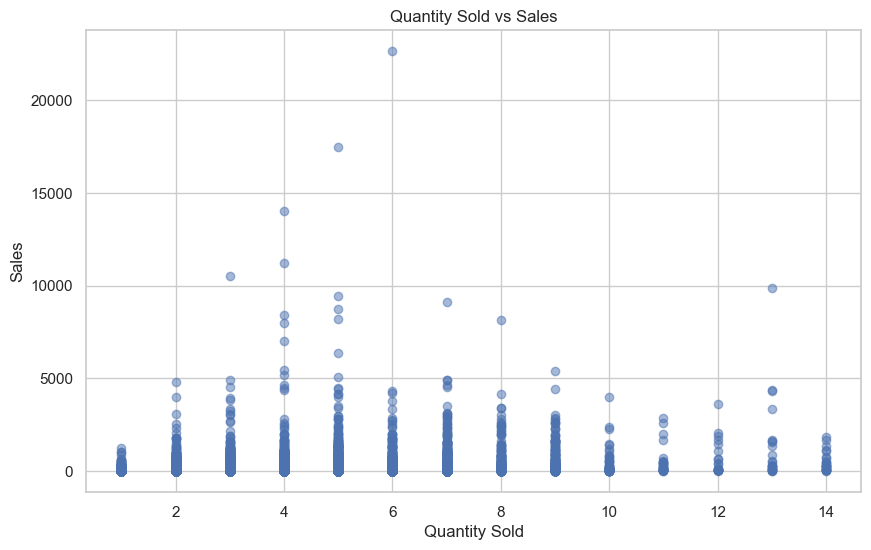

Correlation between Sales and Quantity Sold: 0.20014205168965876


In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5)
plt.title('Quantity Sold vs Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Correlation Coefficient
correlation_sales_quantity = df['Sales'].corr(df['Quantity'])
print("Correlation between Sales and Quantity Sold:", correlation_sales_quantity)

The analysis indicates a weak positive correlation (r ≈ 0.20) between sales and quantity sold, suggesting that as the quantity of items sold increases, there is a tendency for sales to increase, albeit weakly. 






### What is the relationship between discounts offered and sales/profit?

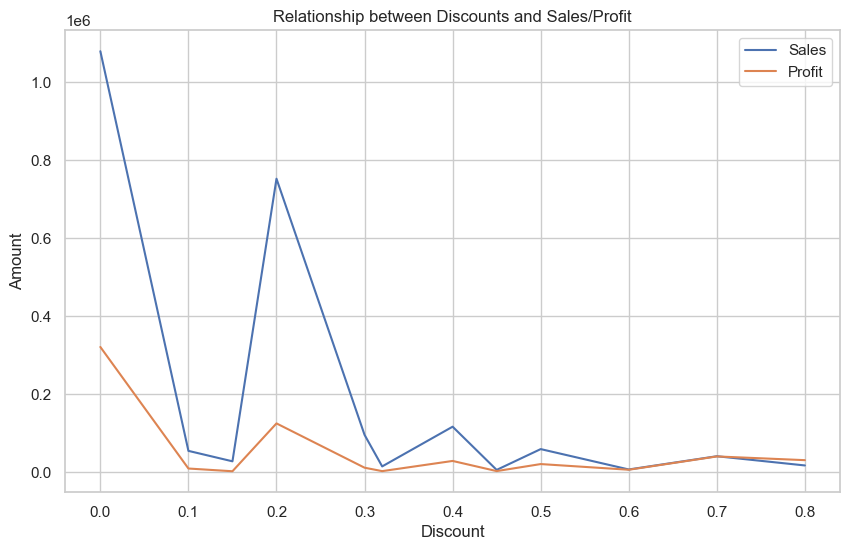

Correlation between discounts and sales: -0.5698442614970546
Correlation between discounts and profit: -0.46844090965232277


In [84]:

# Load your dataset into a pandas DataFrame (assuming it's already loaded)

# Calculate average discount, total sales, and total profit for each discount level
discount_sales_profit = df.groupby('Discount').agg({'Sales':'sum', 'Profit':'sum', 'Quantity':'sum'}).reset_index()

# Visualize the relationship between discounts and sales/profit
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Sales', data=discount_sales_profit, label='Sales')
sns.lineplot(x='Discount', y='Profit', data=discount_sales_profit, label='Profit')
plt.title('Relationship between Discounts and Sales/Profit')
plt.xlabel('Discount')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Calculate correlation coefficient between discounts and sales/profit
correlation_sales = np.corrcoef(discount_sales_profit['Discount'], discount_sales_profit['Sales'])[0, 1]
correlation_profit = np.corrcoef(discount_sales_profit['Discount'], discount_sales_profit['Profit'])[0, 1]

print(f"Correlation between discounts and sales: {correlation_sales}")
print(f"Correlation between discounts and profit: {correlation_profit}")


The analysis reveals a moderate negative correlation between discounts offered and both sales and profit. Specifically, the correlation coefficient for discounts and sales is approximately -0.57, indicating that as discounts increase, sales tend to decrease. Similarly, the correlation coefficient for discounts and profit is around -0.47, suggesting that higher discounts are associated with lower profit margins. 

# Conclusion:



1. **Discounts and Performance:** Analysis reveals a moderate negative correlation between discounts and both sales and profit, indicating that higher discounts often coincide with decreased sales and profit margins.

2. **Quantity-Sales Relationship:** A weak positive correlation exists between sales and quantity sold, suggesting that while increased quantity tends to elevate sales, the effect is relatively mild.

3. **Sub-Category Profitability:** Copiers and Machines emerge as top performers in profitability, while Fasteners and Art exhibit the lowest profitability among sub-categories.

4. **Category Performance:** Technology shines as the highest performer in mean sales and profit, followed by Furniture, with Office Supplies lagging behind.

5. **Regional Dynamics:** The East region leads in profitability, while the West region dominates in total sales, showcasing diverse regional strengths.

6. **Segment Insights:** Consumers prove to be the most significant contributors to both profit and sales, surpassing Corporate and Home Office segments.

7. **Shipping Mode Preference:** Standard Class emerges as the favored shipping mode, highlighting its widespread popularity among consumers.

8. **Discount Impact:** Discounts beyond 0.6 show a detrimental effect on average profit, implying a delicate balance required between discount offerings and profit margins.

9. **Top Products:** Phones in the Technology category and Binders in Office Supplies stand out as top-selling products, driving substantial sales and profit contributions.

10. **Category Influence:** Technology emerges as the cornerstone of both sales and profit, underscoring its pivotal role in overall performance across categories.



In [90]:


# Assuming your data is stored in a DataFrame named 'df'
# You can read your data into a DataFrame using pd.read_csv('your_data.csv')

# Grouping data by region and calculating total sales and profit
region_total_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()

# Grouping data by region and counting the number of entries
region_counts = df.groupby('Region').size()

# Calculating the average sales and profit
region_avg_sales_profit = region_total_sales_profit.copy()
region_avg_sales_profit['Average Sales'] = region_total_sales_profit['Sales'] / region_counts
region_avg_sales_profit['Average Profit'] = region_total_sales_profit['Profit'] / region_counts

# Sorting by average profit in descending order
region_avg_sales_profit = region_avg_sales_profit.sort_values(by='Average Profit', ascending=False)

print("Average Sales and Profit by Region (Descending Order):")
print(region_avg_sales_profit)


Average Sales and Profit by Region (Descending Order):
               Sales       Profit  Average Sales  Average Profit
Region                                                          
East     670079.9380  190703.9950     236.861060       67.410391
Central  497105.5758  152336.1325     215.011062       65.889331
South    385656.5770  101759.0949     239.985424       63.322399
West     716671.9225  153860.3707     225.297681       48.368554
